# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from datetime import datetime, timedelta
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient
import json

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/fabricesalomon/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv("key.env")

True

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])



In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_top_headlines(q="Bitcoin", language="en", country="us")
bitcoin_headlines

###fetching = dverything
all_bitcoin_articles = newsapi.get_everything(q='Bitcoin',
                                              sources='bbc-news,the-verge',
                                      domains='bbc.co.uk,techcrunch.com',
                                      from_param='2022-05-23',
                                      to='2022-05-15',
                                      language='en',
                                      sort_by='relevancy',)


In [5]:
# Fetch the Ethereum news articles
###fetching ethereum top headlines
ethereum_headlines = newsapi.get_top_headlines(q="Ethereum", language="en", country="us")
ethereum_headlines
###fetching everything 
all_eth_articles = newsapi.get_everything(q='ethereum',
                                              sources='bbc-news,the-verge',
                                      domains='bbc.co.uk,techcrunch.com',
                                      from_param='2022-05-23',
                                      to='2022-05-15',
                                      language='en',
                                      sort_by='relevancy',)


type(all_eth_articles)

dict

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in all_bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_sentiment_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_sentiment_df = bitcoin_sentiment_df[cols]

bitcoin_sentiment_df.head()

            

,date,text,compound,positive,negative,neutral
0,2022-05-17,By Mariko OiAsia business correspondent\r\nIma...,0.0000,0.000,0.000,1.000
1,2022-05-20,Illustration by Alex Castro / The Verge\r\n\n ...,0.2263,0.050,0.000,0.950
2,2022-05-23,"By Joe TidyCyber reporter \r\nImage caption, ""...",-0.4767,0.074,0.183,0.743
3,2022-05-16,Like Jason Voorhees the myth of virtual curren...,0.2500,0.148,0.098,0.754
4,2022-05-16,To get a roundup of TechCrunchs biggest and mo...,0.5563,0.119,0.000,0.881


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in all_eth_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_sentiment_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_sentiment_df = eth_sentiment_df[cols]

eth_sentiment_df.head()

            

,date,text,compound,positive,negative,neutral
0,2022-05-20,Illustration by Alex Castro / The Verge\r\n\n ...,0.2263,0.050,0.000,0.950
1,2022-05-17,By Annabelle LiangBusiness reporter\r\nImage s...,-0.1280,0.072,0.110,0.818
2,2022-05-17,Sam Rosenblum never imagined he would work at ...,0.2023,0.055,0.000,0.945
3,2022-05-16,"On the Chain Reaction podcast this week, we sp...",0.2732,0.062,0.000,0.938
4,2022-05-16,30-year-old crypto billionaire Sam Bankman-Fri...,-0.2960,0.000,0.068,0.932


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_sentiment_df.describe()

,compound,positive,negative,neutral
count,16.000000,16.000000,16.000000,16.000000
mean,0.163344,0.080063,0.054625,0.865312
std,0.417708,0.058248,0.086650,0.097328
min,-0.926000,0.000000,0.000000,0.688000
25%,0.000000,0.037500,0.000000,0.783000
50%,0.261600,0.080000,0.000000,0.882000
75%,0.463275,0.134000,0.071500,0.939750
max,0.571900,0.153000,0.312000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,compound,positive,negative,neutral
count,14.000000,14.000000,14.00000,14.000000
mean,0.128800,0.067643,0.04500,0.887286
std,0.404074,0.040808,0.08574,0.075297
min,-0.926000,0.000000,0.00000,0.688000
25%,-0.064000,0.050250,0.00000,0.872250
50%,0.214300,0.067000,0.00000,0.916500
75%,0.458800,0.084750,0.06725,0.936500
max,0.526700,0.140000,0.31200,0.958000


### Questions:

Q: Which coin had the highest mean positive score?

A: at the moment of the analysis the mena positive scote of Eth is higher at 0.069500 while the bitcoin is 0.03025.

Q: Which coin had the highest compound score?

A: Eth had the higest compound score with the min of 0.000 and the max of 0.659700 Bitcoin had a lower compound score with a min of -0.7000300 and the max of 0.458800

Q. Which coin had the highest positive score?

A: Eth had a higher max positive score of 0.1570000 and Bitcoin had a max positive score of 0.121000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
nltk.download("stopwords")
#nltk.downlaod("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fabricesalomon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [12]:
###transforming my json data, lowering and tokenizings the str and
str_bitcoin_articles = json.dumps(all_bitcoin_articles)
bitcoin_sentence = sent_tokenize(str_bitcoin_articles)
bitcoin_sentence = json.dumps(bitcoin_sentence)
bitcoin_words = [w.lower() for w in word_tokenize(bitcoin_sentence)]
bitcoin_words = json.dumps(bitcoin_words)

In [13]:
###transforming my json data to a strings and tokenizings the str
str_eth_articles = json.dumps(all_eth_articles)
eth_sentence = sent_tokenize(str_eth_articles)
eth_sentence = json.dumps(eth_sentence)
eth_words = [w.lower() for w in word_tokenize(eth_sentence)]
eth_words = json.dumps(eth_words)

In [15]:
# Create a list of stopwords
sw = set(stopwords.words("english"))

first_result = [word for word in words if word.lower() not in sw]
# Expand the default stopwords list if necessary
sw_addon = {'foxes', 'walk', 'boxes', '.'}
second_result = [word for word in words if word.lower()not in sw]

NameError: name 'words' is not defined

In [16]:
##using regex t substute everything that is not a letter a with entpty string
regex = re.compile("[^a-zA-Z0-9 ]")
bitcoin_re_clean = regex.sub('', bitcoin_words)
eth_re_clean = regex.sub('', bitcoin_words)

##re-tokenizing string
re_tokenized_bitcoin = word_tokenize(bitcoin_re_clean)
re_tokenized_eth = word_tokenize(eth_re_clean)

bitcoin_re_result = [word.lower() for word in re_tokenized_bitcoin if word.lower() not in sw.union(sw_addon)]
eth_re_result = [word.lower() for word in re_tokenized_eth if word.lower() not in sw.union(sw_addon)]


NameError: name 'sw_addon' is not defined

In [17]:
# Complete the tokenizer function
def tokenizer(text):
    str_text = json.dumps(all_bitcoin_articles)
  # Remove the stop words
    sw = set(stopwords.words('english'))
  # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str_text)
  # Create a tokenized list of the words
    words = word_tokenize(re_clean)
  # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
  # Convert the words to lowercase
    output = [word.lower() for word in lem if word.lower() not in sw]

    return output

In [18]:
# Create a new tokens column for Bitcoin
#tokenizer(all_bitcoin_articles)


In [19]:
# Create a new tokens column for Ethereum
#tokenizer(all_eth_articles)

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [20]:
from collections import Counter
from nltk import ngrams

In [21]:
# Generate the Bitcoin N-grams where N=2
bitcoin_tokens = tokenizer(all_bitcoin_articles)
word_counts = Counter(bitcoin_tokens)
bigram_counts = Counter(ngrams(bitcoin_tokens, n=2))
print(bigram_counts)

Counter({('source', 'id'): 16, ('publishedat', 'tz'): 16, ('tz', 'content'): 16, ('char', 'source'): 15, ('id', 'techcrunch'): 10, ('techcrunch', 'name'): 10, ('name', 'techcrunch'): 10, ('techcrunch', 'author'): 10, ('chain', 'reaction'): 8, ('reaction', 'podcast'): 6, ('podcast', 'week'): 6, ('welcome', 'back'): 6, ('u', 'char'): 5, ('kevin', 'rose'): 5, ('id', 'theverge'): 4, ('theverge', 'name'): 4, ('name', 'verge'): 4, ('verge', 'author'): 4, ('everyone', 'welcome'): 4, ('back', 'chain'): 4, ('week', 'anita'): 4, ('anita', 'chatted'): 4, ('alex', 'castro'): 3, ('sam', 'bankmanfried'): 3, ('sam', 'rosenblum'): 3, ('crypto', 'wallet'): 3, ('author', 'lucas'): 3, ('lucas', 'matney'): 3, ('matney', 'title'): 3, ('true', 'ventures'): 3, ('id', 'bbcnews'): 2, ('bbcnews', 'name'): 2, ('name', 'bbc'): 2, ('bbc', 'news'): 2, ('news', 'author'): 2, ('author', 'httpswwwfacebookcombbcnews'): 2, ('httpswwwfacebookcombbcnews', 'title'): 2, ('wa', 'arrested'): 2, ('title', 'us'): 2, ('payment',

In [22]:
# Generate the Ethereum N-grams where N=2
eth_tokens = tokenizer(all_eth_articles)
word_counts = Counter(eth_tokens)
bigram_counts = Counter(ngrams(eth_tokens, n=2))
print(bigram_counts)

Counter({('source', 'id'): 16, ('publishedat', 'tz'): 16, ('tz', 'content'): 16, ('char', 'source'): 15, ('id', 'techcrunch'): 10, ('techcrunch', 'name'): 10, ('name', 'techcrunch'): 10, ('techcrunch', 'author'): 10, ('chain', 'reaction'): 8, ('reaction', 'podcast'): 6, ('podcast', 'week'): 6, ('welcome', 'back'): 6, ('u', 'char'): 5, ('kevin', 'rose'): 5, ('id', 'theverge'): 4, ('theverge', 'name'): 4, ('name', 'verge'): 4, ('verge', 'author'): 4, ('everyone', 'welcome'): 4, ('back', 'chain'): 4, ('week', 'anita'): 4, ('anita', 'chatted'): 4, ('alex', 'castro'): 3, ('sam', 'bankmanfried'): 3, ('sam', 'rosenblum'): 3, ('crypto', 'wallet'): 3, ('author', 'lucas'): 3, ('lucas', 'matney'): 3, ('matney', 'title'): 3, ('true', 'ventures'): 3, ('id', 'bbcnews'): 2, ('bbcnews', 'name'): 2, ('name', 'bbc'): 2, ('bbc', 'news'): 2, ('news', 'author'): 2, ('author', 'httpswwwfacebookcombbcnews'): 2, ('httpswwwfacebookcombbcnews', 'title'): 2, ('wa', 'arrested'): 2, ('title', 'us'): 2, ('payment',

In [23]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(10)

In [24]:
# Use token_count to get the top 10 words for Bitcoin
token_count(bitcoin_tokens, N=3)

[('techcrunch', 26),
 ('crypto', 20),
 ('name', 17),
 ('source', 16),
 ('id', 16),
 ('author', 16),
 ('title', 16),
 ('description', 16),
 ('url', 16),
 ('urltoimage', 16)]

In [25]:
# Use token_count to get the top 10 words for Ethereum
token_count(bitcoin_tokens, N=3)

[('techcrunch', 26),
 ('crypto', 20),
 ('name', 17),
 ('source', 16),
 ('id', 16),
 ('author', 16),
 ('title', 16),
 ('description', 16),
 ('url', 16),
 ('urltoimage', 16)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [27]:
def word_cloud_tokenizer(text):
    str_text = json.dumps(all_bitcoin_articles)
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str_text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    big_string = ' '.join(output)
    wc = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(big_string)
    plot = plt.imshow(wc,interpolation='bilinear')
    plt.axis("off")
    return plot

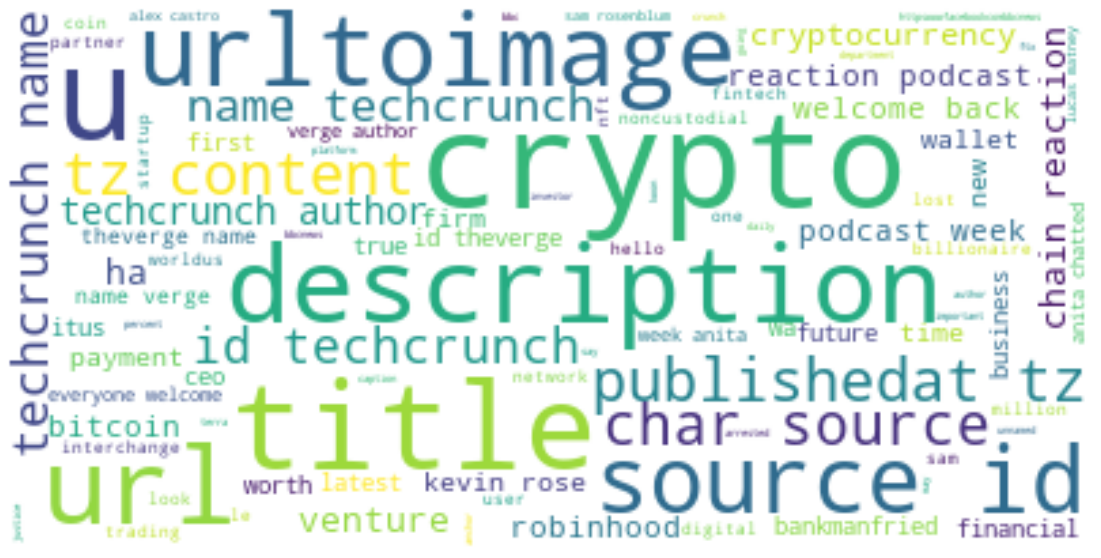

In [28]:
# Generate the Bitcoin word cloud
word_cloud_tokenizer(all_bitcoin_articles)

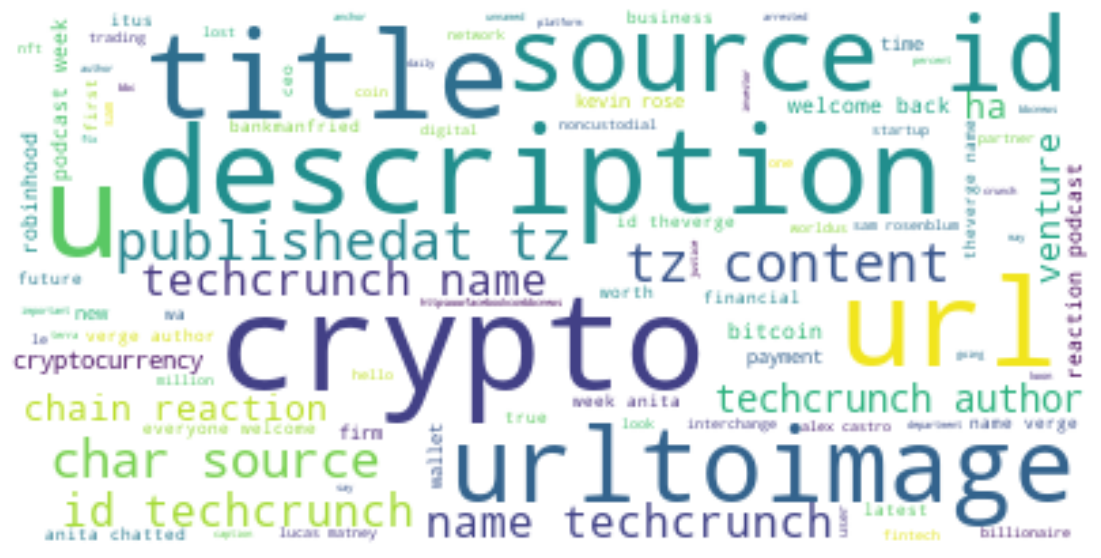

In [29]:
# Generate the Ethereum word cloud
word_cloud_tokenizer(all_eth_articles)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [30]:
import spacy
from spacy import displacy

In [31]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [32]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [33]:
# Concatenate all of the Bitcoin text together
ner_bitcoin_articles = json.dumps(all_bitcoin_articles)

In [34]:
# Run the NER processor on all of the text
def named_entity_recongnition(text): 
    """making a funtion to extract the organisations and contries mention en the articles,
    the function take only on argument "text = json".
    """ 
    nlp = spacy.load('en_core_web_sm')
    all_bitcoin_sentences = json.dumps(text)
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', all_bitcoin_sentences)
    sw = set(stopwords.words('english'))
    new_bitcoin_tokens = nlp(re_clean)
    displacy.render(new_bitcoin_tokens, style="ent")
    entities = [ent.text for ent in new_bitcoin_tokens.ents if ent.label_ in ['GPE', 'ORG']]
    print(entities)
    return plot

# Add a title to the document
# YOUR CODE HERE!

In [35]:
# Render the visualization
named_entity_recongnition(all_bitcoin_articles)

['BBC News', 'httpscdnvoxcdncomthumborIVLqTILLdUKKGUtECQahHroxxfitinxcdnvoxcdncomuploadschorusassetfileacastronftjpg publishedAt TZ', 'BBC News', 'httpsichefbbcicouknewsbrandednewsAABproductionfacdacdfbdddajpg', 'TZ', 'Verge', 'US', 'DC', 'httpscdnvoxcdncomthumboraltkKNBnaLUpbAVPijxmCUgxxfitinxcdnvoxcdncomuploadschorusassetfileacastrobitcoinjpg', 'Department of Justice', 'TechCrunch', 'FTX', 'TZ', 'TechCrunchs', 'TechCrunch', 'Amanda Silberling', 'UST', 'TZ', 'ICYMI', 'TechCrunch', 'Connie Loizos', 'httpssyimgcomnyapiresDWycSMxRqKGkBoPGhsAYXBwaWQaGlnaGxhbmRlcjtPTEyMDAaDOTkhttpssyimgcomuuapirescgUYnrsmReGFiboVABaDNzIdzxNzQOFwcGlkPXlYWNoeWuhttpsmediazenfscomentechcrunchaeffdaeadad', 'Robinhood', 'Itus', 'Robinhood', 'TechCrunch', 'Lucas Matney', 'the Chain Reaction', 'Digg', 'TechCrunch', 'TZ', 'Digg', 'TechCrunch', 'TechCrunch', 'the Financial Times', 'FTX', 'TZ', 'the Financial Times', 'TechCrunch', 'TZ', 'Verge', 'Miamius CityCoin', 'httpscdnvoxcdncomthumborsREEAuVtvRaTCvBgxsxxfitinxc

NameError: name 'plot' is not defined

In [ ]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [36]:
# Concatenate all of the Ethereum text together
named_entity_recongnition(all_eth_articles)

['httpscdnvoxcdncomthumborIVLqTILLdUKKGUtECQahHroxxfitinxcdnvoxcdncomuploadschorusassetfileacastronftjpg publishedAt TZ', 'BBC News', 'US', 'North Korea', 'TZ', 'Getty ImagesrnThe US', 'North Korea', 'TechCrunch', 'Connie Loizos', 'httpssyimgcomnyapiresDWycSMxRqKGkBoPGhsAYXBwaWQaGlnaGxhbmRlcjtPTEyMDAaDOTkhttpssyimgcomuuapirescgUYnrsmReGFiboVABaDNzIdzxNzQOFwcGlkPXlYWNoeWuhttpsmediazenfscomentechcrunchaeffdaeadad', 'TechCrunch', 'Lucas Matney', 'the Chain Reaction', 'Digg', 'TechCrunch', 'TZ', 'Digg', 'TechCrunch', 'TechCrunch', 'the Financial Times', 'FTX', 'TZ', 'the Financial Times', 'TechCrunch', 'Amanda Silberling', 'UST', 'TZ', 'ICYMI', 'TechCrunch', 'Twitter', 'TZ', 'Verge', 'DeviantArt', 'NFT', 'DeviantArt', 'Ethereum', 'httpscdnvoxcdncomthumboroKkLyCZtBsKeKcqmMQxxfitinxcdnvoxcdncomuploadschorusassetfileassetasamebyteamdemiqztprepng', 'DeviantArt', 'DeviantArt', 'Justin SullivanGetty ImagesrnGameStop', 'TechCrunch', 'The Interchange', 'Bettercom description Welcome', 'Interchange

NameError: name 'plot' is not defined

In [ ]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [ ]:
# List all Entities
# YOUR CODE HERE!

---